# Monte Carlo $\pi$ Simulation

Michael Silverstein

Inspired by: https://www.youtube.com/watch?v=7ESK5SaP-bc

Given that $A_{circle}=\pi r^2$ and $A_{square}=r^2$, then $\pi=\frac{A_{circle}}{A_{square}}$. Below, the areas of a circle and square are approximated using a Monte Carlo where points are randomly sampled from a space. The ratio of the points that land in the circle versus the square are then used to approximate the value of $\pi$.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

# Functions

In [3]:
def in_circle(x, r, c):
    """
    Evaluates if point `x` is inside of a circle centered at `c` with radius `r`
    """
    return np.linalg.norm(np.array(x) - np.array(c)) <= r

def in_square(x, r, bl):
    """
    Evalulates if point `x` is inside of a square with bottom left corner `bl` with side length `r`
    """
    bl = np.array(bl)
    x = np.array(x)
    # Define walls of square
    sq = np.array([bl, bl + r])
    # Check that it's inside
    evaluate = x >= sq
    return evaluate[0].all() & (~evaluate[1]).all()

# Simulation

In [16]:
"""Define shape locations"""
r = 1
# Circle at (0, 0)
c = (0, 0)
# Square centered at (2, 0)
sq_bl = (1.5, -.5)

"""Randomly sample"""
xlim = (-1.25, 2.75)
ylim = (-1.25, 1.25)
n = 2000
randx = np.random.uniform(*xlim, n)
randy = np.random.uniform(*ylim, n)
xy = np.vstack((randx, randy)).T

"""Evaluate"""
df = pd.DataFrame({'x': randx, 'y': randy})
df['c'] = df[['x', 'y']].apply(lambda x: in_circle(x, r, c), 1)
df['s'] = df[['x', 'y']].apply(lambda x: in_square(x, r, sq_bl), 1)
df['Location'] = df[['c', 's']].apply(lambda x: 'Miss' if (~x).all() else 'Square' if x.s else 'Circle', 1)
df.head()

,x,y,c,s,Location
0,-0.527642,1.210851,False,False,Miss
1,1.482325,-0.688030,False,False,Miss
2,0.152189,-1.029956,False,False,Miss
3,2.672935,0.213099,False,False,Miss
4,-0.597295,1.027775,False,False,Miss


In [17]:
"""Calculate pi"""
# A(c) = pi * r ^ 2; A(sq) = r ^ 2 ==> pi = A(c) / A(sq)
pi = df.c.sum()/df.s.sum()
pi

3.2604166666666665

C:\Users\Michael\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


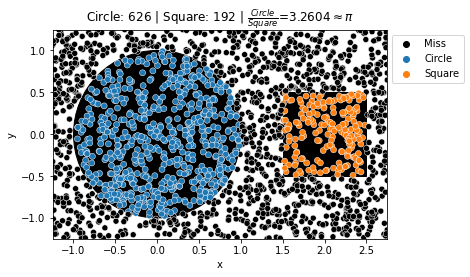

In [19]:
"""Plot"""
c_patch = patches.Circle(c, r, color='k', zorder=0)
sq_patch = patches.Rectangle(sq_bl, r, r, color='k', zorder=0)

plt.figure(figsize=(6, 6))

ax = plt.gca()
ax.add_patch(c_patch)
ax.add_patch(sq_patch)

# Scatter points
palette = dict(zip(['Circle', 'Square'], sns.color_palette()))
palette['Miss'] = 'k'
sns.scatterplot(x='x', y='y', hue='Location', data=df, palette=palette)


plt.xlim(xlim)
plt.ylim(ylim)
ax.set_aspect('equal')
plt.legend(bbox_to_anchor=(1, 1))
plt.title(rf'Circle: {df.c.sum()} | Square: {df.s.sum()} | $\frac{{Circle}}{{Square}}$={pi:.4f}$\approx\pi$')
plt.show()